In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
from matplotlib import gridspec

In [75]:

hdf_file=h5py.File(
        '/DATA/chime-slow/injections_processed/2022/06/21/3135/016ms/1655813489_1655817091_beam_3135_016ms_npulses_40_avgDM_0760_88/cluster_cand/1655813489_1655817091_beam_3135_016ms_npulses_40_avgDM_0760_88_snrthresh_10.0_mincluster_010_minsamp_001_epsilon_1.0_deltaDM_300.0_deltaSNR_05.0.h5'

    ,'r')
inj_events=np.array(hdf_file.get('inj_events'))
clust_info=np.array(hdf_file.get('cluster_info'))
'''
#injection # 0 DM,  1 SNR,  2 Time,  3 PW, 4 Fluence 5 labels (after concate)
#presto   #1 snr, 2 stime, 3 width, 4 dm  5 labels
'''


'\n#injection # 0 DM,  1 SNR,  2 Time,  3 PW, 4 Fluence 5 labels (after concate)\n#presto   #1 snr, 2 stime, 3 width, 4 dm  5 labels\n'

In [76]:
#make the cluster info to pd dataframe
clust_info=pd.DataFrame(clust_info)
#sort inj events by time
inj_events=inj_events[inj_events['TIME'].argsort()]    #
#Sort the cluster info by time
clust_info=clust_info.sort_values(by='TimeMaxSNR',ascending=True)    #  


#filtering part of cluster info  based on labels for inj events
good_labels=inj_events['Label']>0
inj_events=inj_events[good_labels]
filtered_presto = clust_info[(clust_info['Label'].isin(inj_events['Label'].astype(int)))]
#DANGER! JUST AN ARBITRARY LINE for clipping off events with same label, usually located at the end 
if len(inj_events)!=len(filtered_presto):
    inj_events=inj_events[:len(filtered_presto)-len(inj_events)]

Fluence/Sqrt Width at SNR 10 = 0.004344618324294021
Slope is= 0.00013362280682200302


Text(0.5, 0, 'Presto SNR')

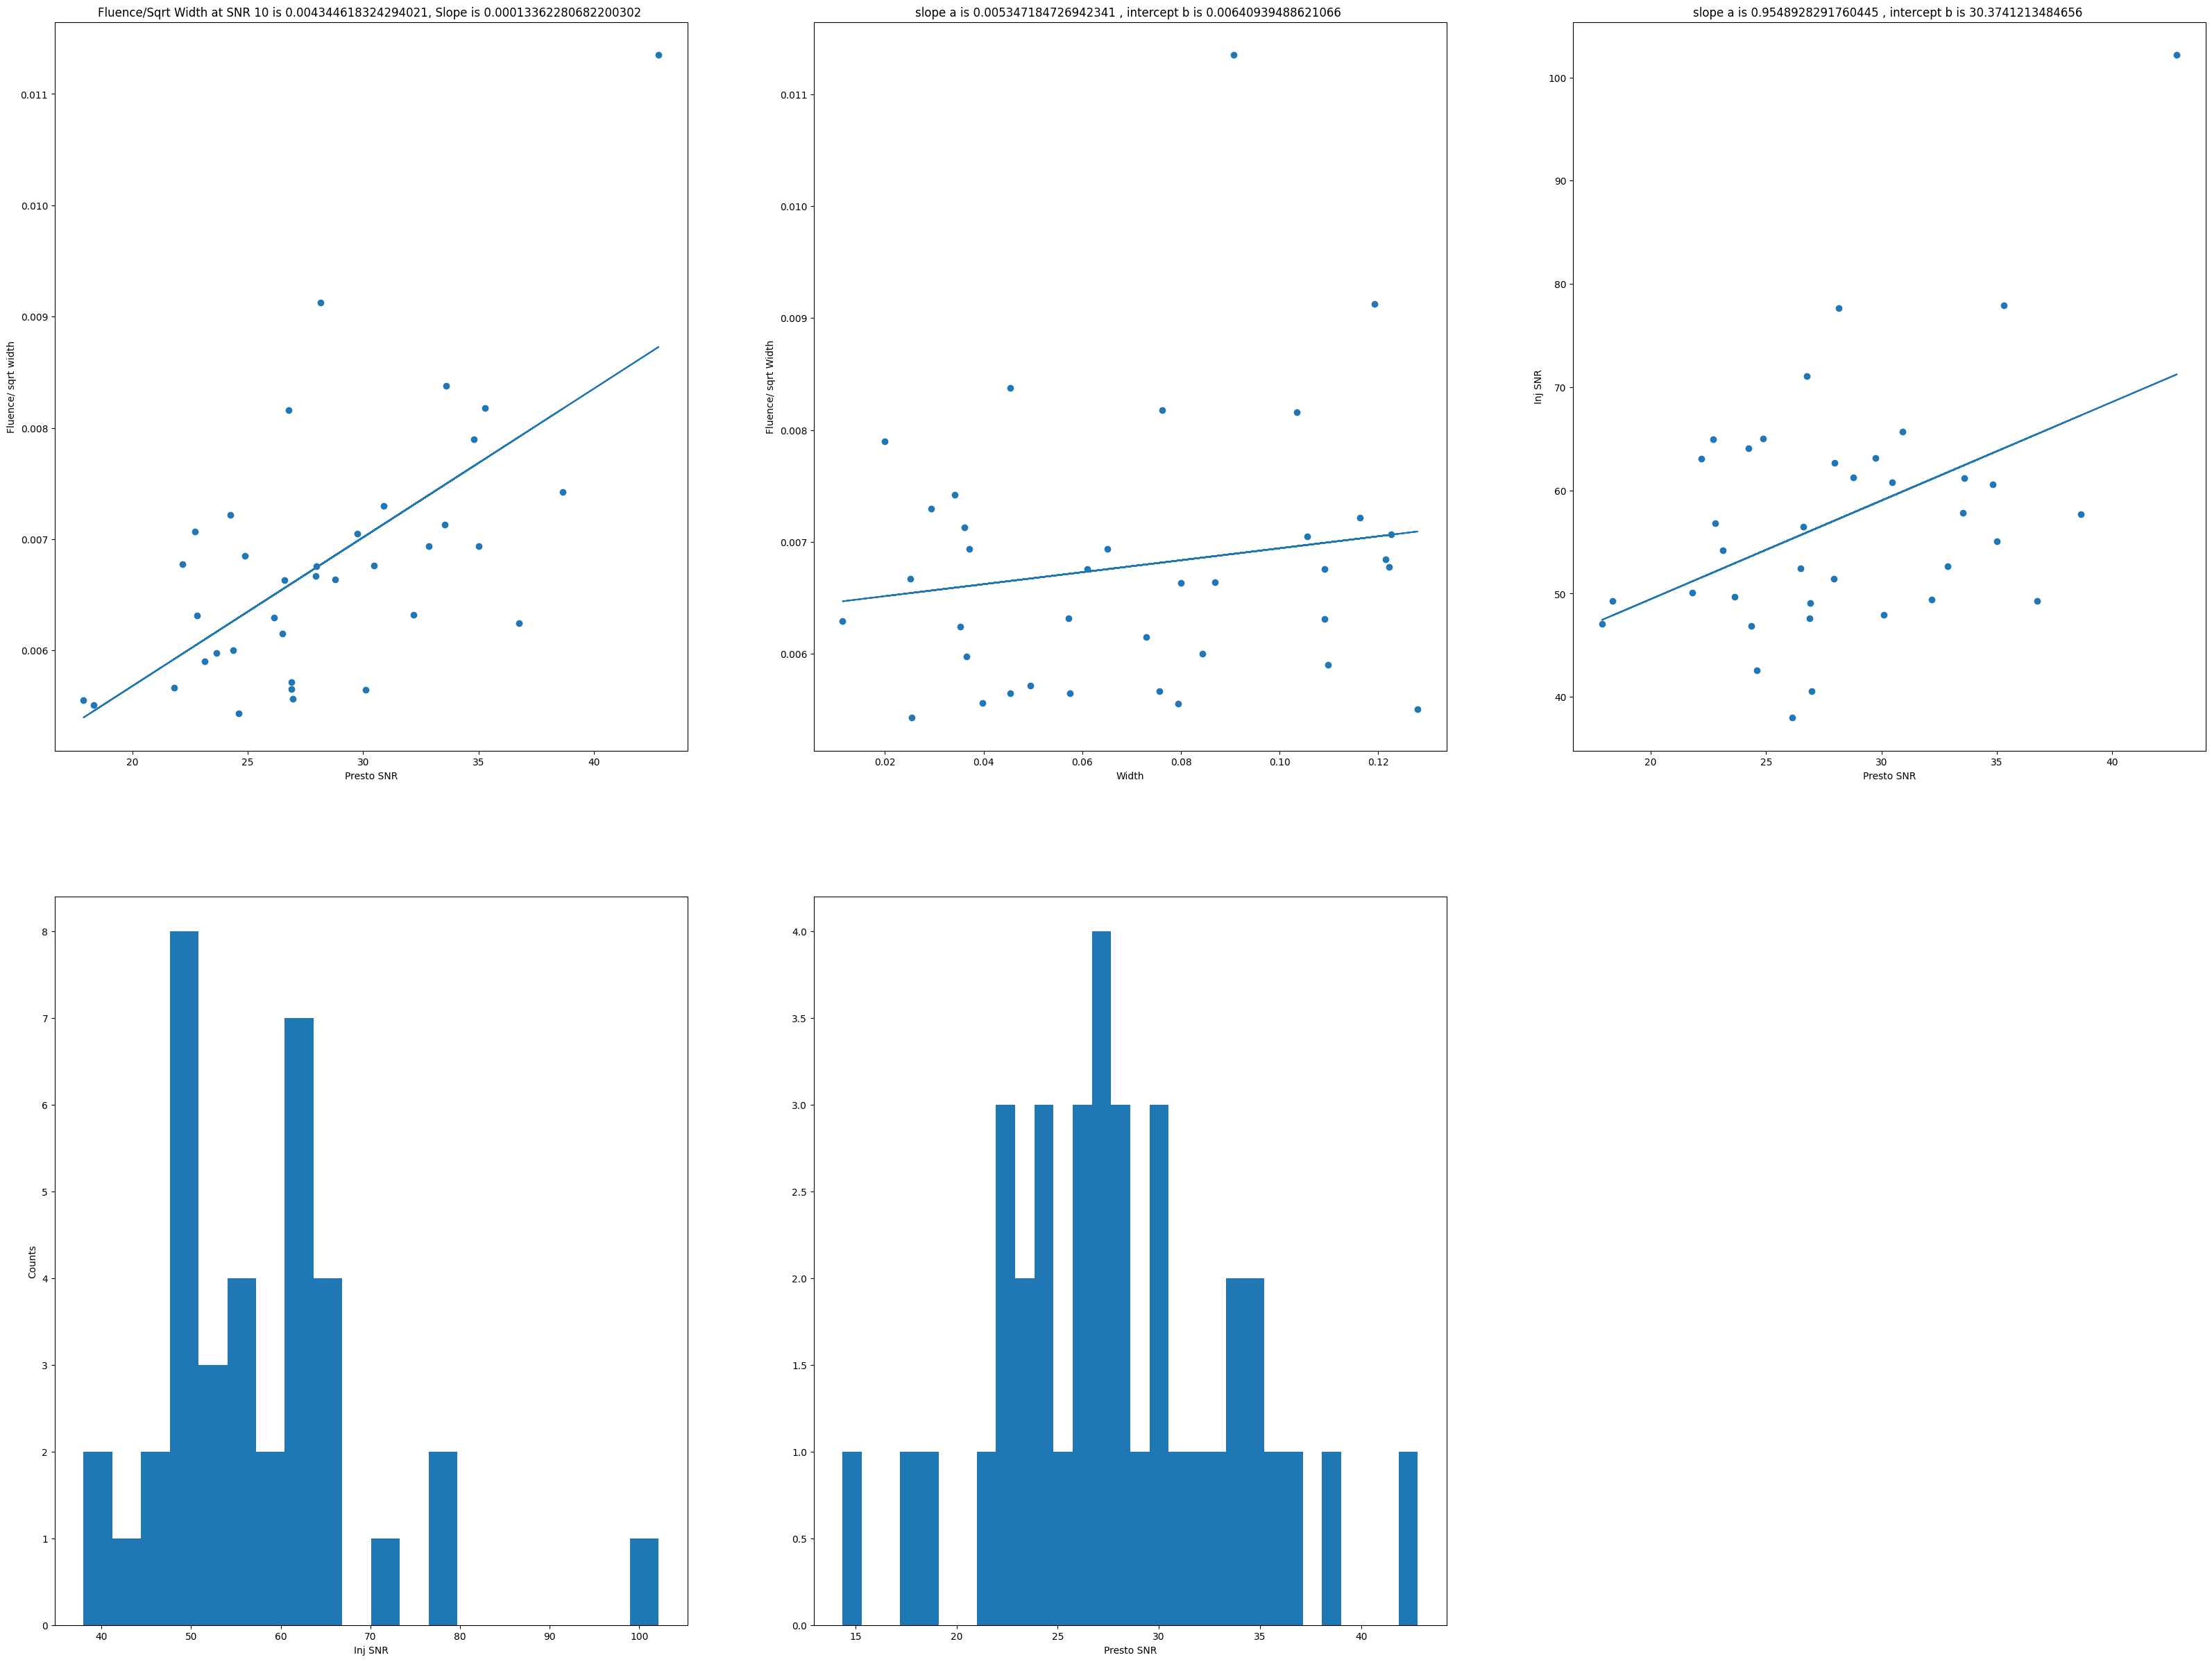

In [77]:

 # Initiate a figure and make 6 grids in it for various subplots
fig = plt.figure(figsize=(40, 30), dpi=100)
grid = gridspec.GridSpec(ncols=3, nrows=2, height_ratios=[2, 2], width_ratios=[2,2,2])

#Presto SNR vs Inj fluence/sqrt Width plot
#fit a line to the scatter plot
a,b=np.polyfit(filtered_presto['MaxSNR'], 
               (inj_events['FLUENCE']/np.sqrt(inj_events['WIDTH'])), 
               1)
Y=10*a+b
print("Fluence/Sqrt Width at SNR 10 =", Y)
print("Slope is=", a)
ax0 = fig.add_subplot(grid[0])
ax0.scatter(filtered_presto['MaxSNR'], 
            inj_events['FLUENCE']/np.sqrt(inj_events['WIDTH']))
ax0.plot(filtered_presto['MaxSNR'], a*filtered_presto['MaxSNR']+b)
ax0.set_xlabel("Presto SNR")
ax0.set_ylabel("Fluence/ sqrt width")
ax0.set_title( "Fluence/Sqrt Width at SNR 10 is {0}, Slope is {1} ".format(Y,a))


#Width vs Inj Fluence/sqrt width
#fit a line to the scatter plot
a1,b1=np.polyfit(inj_events['WIDTH'], 
               (inj_events['FLUENCE']/np.sqrt(inj_events['WIDTH'])), 
               1)

ax1=fig.add_subplot(grid[1])
ax1.scatter(inj_events['WIDTH'], 
            inj_events['FLUENCE']/np.sqrt(inj_events['WIDTH']))
ax1.plot(inj_events['WIDTH'], a1*inj_events['WIDTH']+b1)
ax1.set_xlabel("Width")
ax1.set_ylabel("Fluence/ sqrt Width")
ax1.set_title( "slope a is {0} , intercept b is {1} ".format(a1,b1))



#Presto SNR vs Inj SNR
#fit a line to the scatter plot
a2,b2=np.polyfit(filtered_presto['MaxSNR'], 
               inj_events['SNR'], 
               1)

ax2=fig.add_subplot(grid[2])
ax2.scatter(filtered_presto['MaxSNR'], 
           inj_events['SNR'])
ax2.plot(filtered_presto['MaxSNR'], a2*filtered_presto['MaxSNR']+b2)
ax2.set_xlabel("Presto SNR")
ax2.set_ylabel("Inj SNR")
ax2.set_title( "slope a is {0} , intercept b is {1} ".format(a2,b2))



#Histogram of Inj SNR
ax3 = fig.add_subplot(grid[3])
ax3.hist(inj_events['SNR'], bins= 20)
ax3.set_xlabel("Inj SNR")
ax3.set_ylabel("Counts")

#Histogram of Presto SNR
ax4 = fig.add_subplot(spec[4])
ax4.hist(clust_info['MaxSNR'], bins= 30)
ax4.set_xlabel("Presto SNR")


In [ ]:
'''
injection=np.loadtxt(
    '/DATA/chime-slow/injections_processed/2022/06/21/3135/016ms/1655813489_1655817091_beam_3135_016ms_npulses_40_avgDM_0760_88/1655813489_1655817091_beam_3135_016ms_npulses_40_avgDM_0760_88.injinf'
    )
presto=pd.read_csv(
        '/DATA/chime-slow/injections_processed/2022/06/21/3135/016ms/1655813489_1655817091_beam_3135_016ms_npulses_40_avgDM_0760_88/fetch/1655813489_1655817091_beam_3135_016ms_npulses_40_avgDM_0760_88_cand.csv'

                  ,sep=",")

hdf_file=h5py.File(
        '/DATA/chime-slow/injections_processed/2022/06/21/3135/016ms/1655813489_1655817091_beam_3135_016ms_npulses_40_avgDM_0760_88/cluster_cand/1655813489_1655817091_beam_3135_016ms_npulses_40_avgDM_0760_88_snrthresh_10.0_mincluster_010_minsamp_001_epsilon_1.0_deltaDM_300.0_deltaSNR_05.0.h5'

    ,'r')
inj_events=np.array(hdf_file.get('inj_events'))
clust_info=np.array(hdf_file.get('cluster_info'))
'''
#injection # 0 DM,  1 SNR,  2 Time,  3 PW, 4 Fluence 5 labels (after concate)
#presto   #1 snr, 2 stime, 3 width, 4 dm  5 labels
'''
'''

In [61]:
'''
good_labels=inj_events['Label']>0
inj_events=inj_events[good_labels]
filtered_presto = clust_info[(clust_info['Label'].isin(inj_events['Label'].astype(int)))]
#DANGER! JUST AN ARBITRARY LINE for clipping off events with same label, usually located at the end 
if len(inj_events)!=len(filtered_presto):
    inj_events=inj_events[:len(filtered_presto)-len(inj_events)]
    '''

"\ngood_labels=inj_events['Label']>0\ninj_events=inj_events[good_labels]\nfiltered_presto = clust_info[(clust_info['Label'].isin(inj_events['Label'].astype(int)))]\n#DANGER! JUST AN ARBITRARY LINE for clipping off events with same label, usually located at the end \nif len(inj_events)!=len(filtered_presto):\n    inj_events=inj_events[:len(filtered_presto)-len(inj_events)]\n    "

In [ ]:

'''
#filter out labels in master log injections with all vals >-1
good_labels=injection[:,5]>0 #
injection=injection[good_labels]
#convert to pandas dataframe for easier conversions
injection=pd.DataFrame(injection)
#filter the presto dataframe wrt labels of injections dataframe
filtered_presto = presto[(presto['label'].isin(injection[5].astype(int)))]

#DANGER! JUST AN ARBITRARY LINE for clipping off events with same label, usually located at the end 
if len(injection)!=len(filtered_presto):
    injection=injection[:len(filtered_presto)-len(injection)]
    
    
    
    
    
#Also if using only np arrays then first make presto into np array and keep the injection
#also in np array and do this
#mask=np.isin(presto[:,5],injection[:,5])
#presto=presto[mask]
'''

In [ ]:
'''
# open inj and presto files  y=2x line fit
x=np.linspace(0,max(presto['snr'])+10, 10)
y=2*x

plt.xlabel("Presto SNR")
plt.ylabel("Inj Snr")
plt.scatter(presto['snr'], injection[:,0]) #/injection[390:,3])
plt.plot(x,y, label='y=2x plot')
plt.plot(x,y/2, label= "y=x")
plt.legend()
'''

In [ ]:
"""
# Directly put inj and presto values and line fit
prestosnr=np.array([16.29,13.96,18.84,13.99])
injectionfluence=np.array([0.0075,0.0072,0.0058,0.0061])
injectionwidth=np.array([1.425,1.887,0.644,0.981])
a,b=np.polyfit(prestosnr, 
               (injectionfluence/np.sqrt(injectionwidth)), 
               1)
plt.xlabel("Presto SNR")
plt.ylabel("Fluence/ sqrt width")
plt.scatter(prestosnr, 
            injectionfluence/np.sqrt(injectionwidth))
plt.plot(prestosnr, a*prestosnr+b)
#plt.xlim([10,60])
#plt.legend()
Y=10*a+b
print("Fluence/Sqrt Width at SNR 10 =", Y)
print("Slope is=",a)
"""